In [1]:
# Import my .py code 
# Run this to reimport without having to restart the whole notebook
import calibration_functions
import importlib
importlib.reload(calibration_functions)
from calibration_functions import * 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm as tqdm
import pandas as pd

plt.rcParams['font.size'] = 16
plt.rc("font", family="serif")

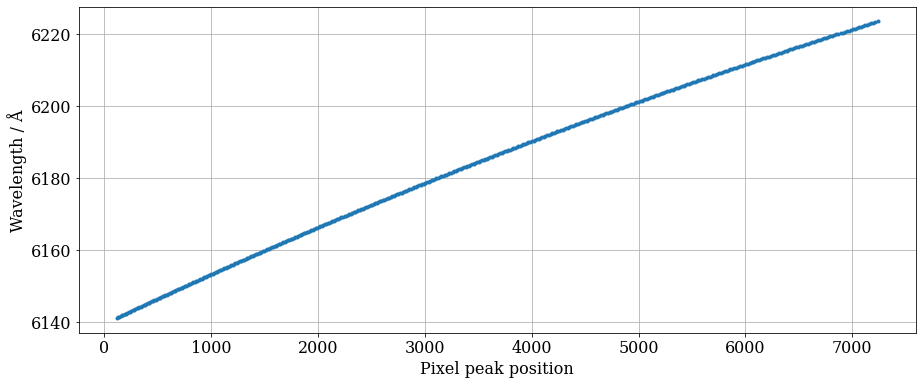

In [14]:
filename = r"expres_tp/LFC_200907.1063.fits"
hdu1 = fits.open(filename)

order = 61
data = hdu1[1].data.copy()
data_spec       = data['spectrum'][order]
data_spec_err   = data['uncertainty'][order]
data_wavel      = data['wavelength'][order]

# Find peaks
peak_info = func_find_peaks(data_spec, 11, 0.15)
peak_locs = peak_info[0]

# Create data slices around each peak
peak_index_ranges = get_peak_index_ranges(peak_locs, peak_range_size = 14)    # TODO: find dynamic way of choosing range size

# Fit peak in each data slice
peak_fits = fit_peaks(data_spec, data_spec_err, peak_index_ranges)

# Get list of true wavelengths
wavel_true = get_true_wavel(data_wavel, peak_locs)[:, 0] # second column is the n in the true wavel peak formula

# Plot
plt.figure(figsize=(15,6))
plt.plot(peak_fits[:,2], wavel_true, ".")
plt.xlabel("Pixel peak position")
plt.ylabel("Wavelength / Å")
plt.grid()

In [16]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

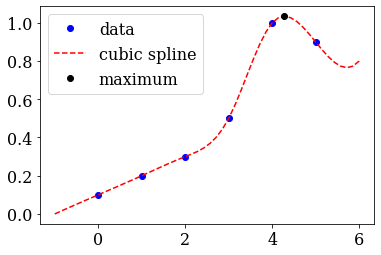

In [17]:

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

m = GEKKO()
m.x = m.Param(value=np.linspace(-1,6))
m.y = m.Var()
m.options.IMODE=2
m.cspline(m.x,m.y,xm,ym)
m.solve(disp=False)
#help(m.cspline)

p = GEKKO()
p.x = p.Var(value=1,lb=0,ub=5)
p.y = p.Var()
p.cspline(p.x,p.y,xm,ym)
p.Obj(-p.y)
p.solve(disp=False)

plt.plot(xm,ym,'bo',label='data')
plt.plot(m.x.value,m.y.value,'r--',label='cubic spline')
plt.plot(p.x.value,p.y.value,'ko',label='maximum')
plt.legend(loc='best')
plt.show()

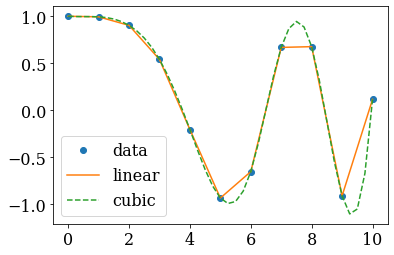

In [22]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)


import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

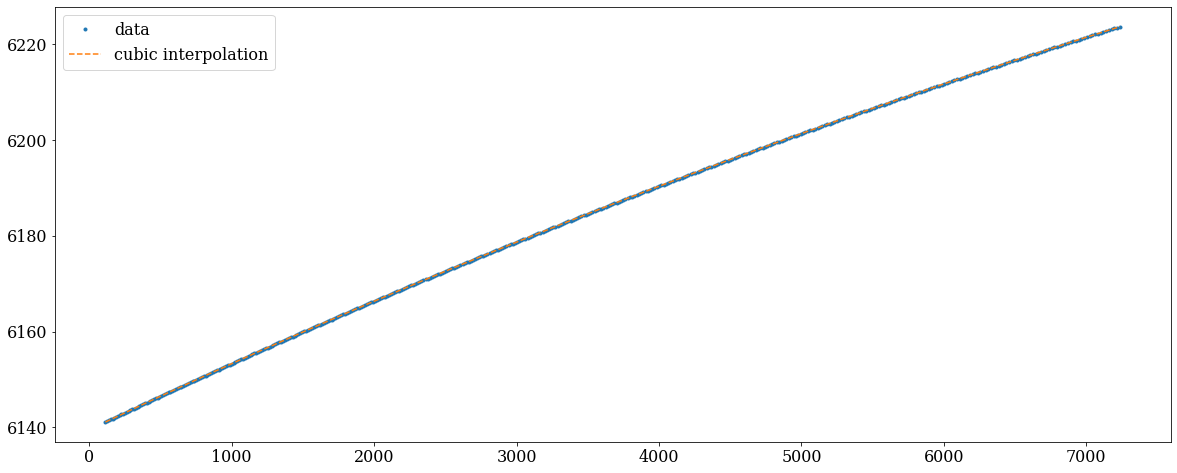

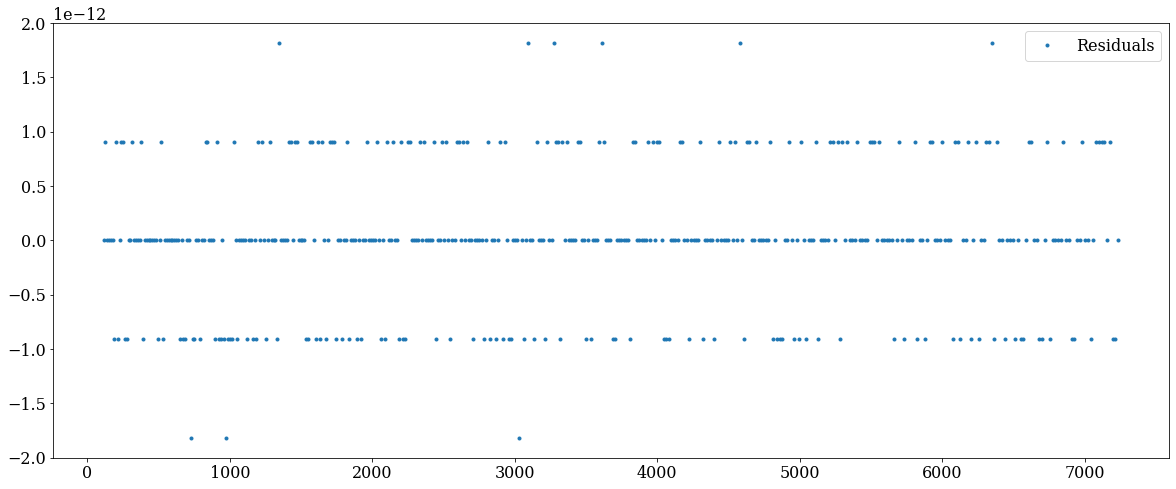

In [34]:
from scipy.interpolate import interp1d

x = peak_fits[:,2]
y = wavel_true 
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(min(x), max(x), 1000, endpoint=True)

plt.figure(figsize=(20,8))
plt.plot(x, y, '.', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic interpolation'], loc='best')

plt.figure(figsize=(20,8))
plt.plot(x, f2(x) - y, ".")
plt.legend(['Residuals'], loc='best')

Interpolate between every second peak and see how they fit in after

In [ ]:
from scipy.interpolate import interp1d

x = peak_fits[:,2][::2]
y = wavel_true[::2]

f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(min(x), max(x), 1000, endpoint=True)

plt.figure(figsize=(20,8))
plt.plot(x, y, '.', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic interpolation'], loc='best')

plt.figure(figsize=(20,8))
plt.plot(x, f2(x) - y, ".")
plt.legend(['Residuals'], loc='best')